# Widgets

`matplotlib`'s [widgets](https://matplotlib.org/stable/api/widgets_api.html) are an excellent way to help an audience gain an understanding of how a transformation revealed a pattern in the data, or how data changes as several parameters are varied.

Consider using widgets to allow an audience to explore a dataset themselves, and to intuitively display how data changes over several dimensions.

Some of `matplotlib`'s [demos](https://matplotlib.org/2.0.2/examples/widgets/index.html) for widgets are included here.

## Setup

To use widgets, we have to have our notebooks configured correctly. Be sure to use the `%matplotlib widget` directive when using widgets in a notebook.


In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

## Sliders Example

Sliders are useful for showing how results vary with respect to a parameter. Humans have trouble visualizing data with respect to more than a few parameters. We can only directly visualize data with respect to three parameters (x, y, and z) and while there are tricks for visualizing data in higher dimensions (like using color) it is more intuitive to allow users to interact with data to reveal patterns within it when it has many dimensions. This can be useful in machine learning when we want to see how data varies with respect to many parameters.

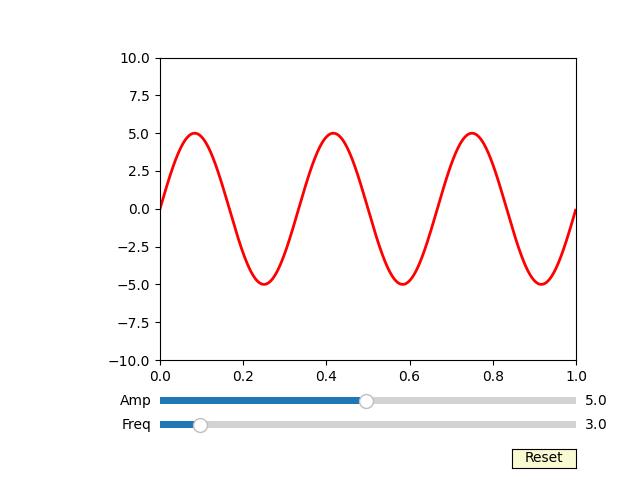

In [2]:
# Create a figure
fig, ax = plt.subplots()

# Adjust the axis position to make room for the slider
plt.subplots_adjust(left=0.25, bottom=0.25)

# Generate some example data
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
sine_data = a0 * np.sin(2 * np.pi * f0 * t)

# Plot the data
(plot_handle,) = plt.plot(t, sine_data, lw=2, color="red")

# Configure the axes
plt.axis([0, 1, -10, 10])

# Build the sliders
axis_color = "lightgoldenrodyellow"
axis_frequency = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
axis_amplitude = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
slider_frequency = Slider(axis_frequency, "Freq", 0.1, 30.0, valinit=f0)
slider_amplitude = Slider(axis_amplitude, "Amp", 0.1, 10.0, valinit=a0)


# Define what to do when the sliders are updated
def update(val):
    amp = slider_amplitude.val
    freq = slider_frequency.val
    plot_handle.set_ydata(amp * np.sin(2 * np.pi * freq * t))
    fig.canvas.draw_idle()


# Call the update function each time the sliders are moved
slider_frequency.on_changed(update)
slider_amplitude.on_changed(update)

# Build the reset button
reset_axis = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(reset_axis, "Reset", color=axis_color, hovercolor="0.975")


# Define what to do when the reset button is pushed
def reset(event):
    slider_frequency.reset()
    slider_amplitude.reset()


# Call the reset function when the reset button is pushed
button.on_clicked(reset)

# Show the plot
plt.show()

## Using Classes to Build a Slider Widget

We can use classes to make a plot with widgets that is more reusable.

In [3]:
def raise_to_zero_power(x_variable):
    """Raise to the power of 0, defining 0**0 = 0"""
    x_equals_0_mask = x_variable == 0
    x_variable[~x_equals_0_mask] = 1
    return x_variable


def compute_lp_norm(x_component, y_component, p_parameter):
    """Compute the LP norm of a 2-element vector."""
    if p_parameter >= 1:
        lp_norm = (
            np.abs(x_component) ** p_parameter
            + np.abs(y_component) ** p_parameter
        ) ** (1 / p_parameter)
    elif p_parameter < 1 and p_parameter > 0:
        lp_norm = (
            np.abs(x_component) ** p_parameter
            + np.abs(y_component) ** p_parameter
        )
    elif p_parameter == 0:
        abs_x_raised_to_zero_power = raise_to_zero_power(np.abs(x_component))
        abs_y_raised_to_zero_power = raise_to_zero_power(np.abs(y_component))
        lp_norm = abs_x_raised_to_zero_power + abs_y_raised_to_zero_power

    return lp_norm


class LPNormDemo:
    """Demonstrate computing the LP norm of a 2-element vector."""

    def __init__(
        self,
        x_range=(-10, 10),
        y_range=(-10, 10),
        grid_size=25,
        n_init=2,
        n_min=0,
        n_max=10,
        cmap="viridis",
        contour_levels=10,
    ):
        self.x_range = x_range
        self.y_range = y_range
        self.grid_size = grid_size
        self.n_init = n_init
        self.n_min = n_min
        self.n_max = n_max
        self.cmap_name = cmap
        self.contour_levels = contour_levels

    def instantiate_plot(self):
        """Creates a plot to demonstrate the LP norm."""
        self._create_surface()
        self._create_plot()
        self._plot_initial_surface()
        self._create_colorbar()
        self._configure_plot_axes()
        self._build_slider()
        self.slider.on_changed(self._update)
        plt.show()

    def _build_slider(self):
        self.ax_slider = plt.axes(
            [0.1, 0.05, 0.8, 0.05], facecolor="lightgray"
        )
        self.slider = Slider(
            self.ax_slider,
            r"$P$",
            self.n_min,
            self.n_max,
            valinit=self.n_init,
            valstep=0.1,
        )

    def _create_colorbar(self):
        self.cbar = plt.colorbar(self.cmap, ax=self.ax)
        self.cbar.set_label(r"$L^P$ Norm")

    def _plot_initial_surface(self):
        self.cmap = self.ax.imshow(
            self.p_norm,
            extent=[*self.x_range, *self.y_range],
            origin="lower",
            cmap=self.cmap_name,
        )
        self.contours = self.ax.contour(
            self.x_component,
            self.y_component,
            self.p_norm,
            levels=self.contour_levels,
            colors="black",
            linewidths=1,
        )
        self.ax.clabel(self.contours, inline=True, fontsize=8, fmt="%1.1f")

    def _configure_plot_axes(self):
        self.ax.set_xlabel(r"$x_1$")
        self.ax.set_ylabel(r"$x_2$")
        self.ax.set_title(r"$L^P$ Norm Demonstration")
        xtick_labels = self.ax.get_xticklabels()
        ytick_labels = self.ax.get_yticklabels()
        cbar_labels = self.cbar.ax.get_yticklabels()
        tick_labels = xtick_labels + ytick_labels + cbar_labels
        for label in tick_labels:
            label.set_fontsize(12)
            label.set_color("black")
            label.usetex = True

    def _create_plot(self):
        self.fig, self.ax = plt.subplots()
        plt.subplots_adjust(left=0.1, bottom=0.25)

    def _create_surface(self):
        self.x_component, self.y_component = np.meshgrid(
            np.linspace(*self.x_range, self.grid_size),
            np.linspace(*self.y_range, self.grid_size),
        )
        self.p_norm = compute_lp_norm(
            self.x_component, self.y_component, self.n_init
        )

    def _update(self, val):
        p_parameter = self.slider.val
        self.p_norm = compute_lp_norm(
            self.x_component, self.y_component, p_parameter
        )
        self.cmap.set_data(self.p_norm)
        self.cbar.update_normal(self.cmap)
        self.contours.remove()
        self.contours = self.ax.contour(
            self.x_component,
            self.y_component,
            self.p_norm,
            levels=self.contour_levels,
            colors="black",
            linewidths=1,
        )
        self.ax.clabel(self.contours, inline=True, fontsize=8, fmt="%1.1f")
        self.fig.canvas.draw_idle()

Now we can use our plot as follows.

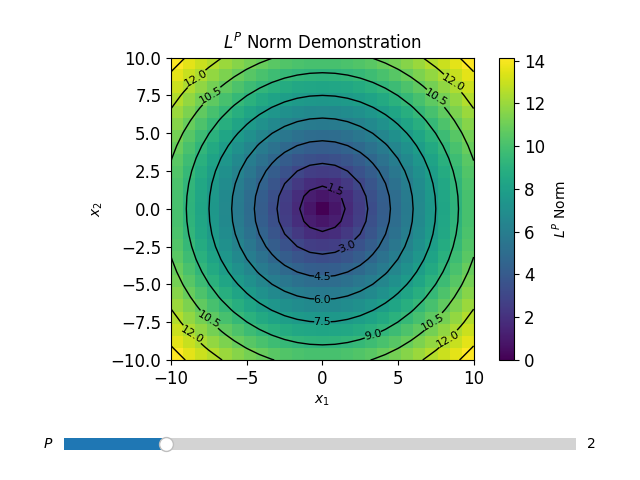

In [4]:
lp_norm_demo = LPNormDemo()
lp_norm_demo.instantiate_plot()